In [85]:
import numpy as np
import json
import matplotlib.pyplot as plt
import numpy as np
import json

# Load Heart Rate Data

In [2]:
x = {"activities-heart":[{"customHeartRateZones":[{"caloriesOut":16.03365,"max":80,"min":30,"minutes":10,"name":"Below"},{"caloriesOut":113.7351,"max":150,"min":80,"minutes":51,"name":"Custom Zone"},{"caloriesOut":0,"max":220,"min":150,"minutes":0,"name":"Above"}],"dateTime":"2022-12-30","heartRateZones":[{"caloriesOut":126.07755,"max":125,"min":30,"minutes":60,"name":"Out of Range"},{"caloriesOut":0,"max":149,"min":125,"minutes":0,"name":"Fat Burn"},{"caloriesOut":0,"max":178,"min":149,"minutes":0,"name":"Cardio"},{"caloriesOut":0,"max":220,"min":178,"minutes":0,"name":"Peak"}],"value":"86.59"}],"activities-heart-intraday":{"dataset":[{"time":"08:30:00","value":79},{"time":"08:31:00","value":79},{"time":"08:32:00","value":81},{"time":"08:33:00","value":81},{"time":"08:34:00","value":84},{"time":"08:35:00","value":77},{"time":"08:36:00","value":77},{"time":"08:37:00","value":72},{"time":"08:38:00","value":82},{"time":"08:39:00","value":88},{"time":"08:40:00","value":88},{"time":"08:41:00","value":87},{"time":"08:42:00","value":90},{"time":"08:43:00","value":89},{"time":"08:44:00","value":93},{"time":"08:45:00","value":98},{"time":"08:46:00","value":97},{"time":"08:47:00","value":74},{"time":"08:48:00","value":73},{"time":"08:49:00","value":79},{"time":"08:50:00","value":89},{"time":"08:51:00","value":77},{"time":"08:52:00","value":87},{"time":"08:53:00","value":82},{"time":"08:54:00","value":77},{"time":"08:55:00","value":80},{"time":"08:56:00","value":85},{"time":"08:57:00","value":82},{"time":"08:58:00","value":87},{"time":"08:59:00","value":85},{"time":"09:00:00","value":94},{"time":"09:01:00","value":93},{"time":"09:02:00","value":92},{"time":"09:03:00","value":99},{"time":"09:04:00","value":101},{"time":"09:05:00","value":107},{"time":"09:06:00","value":90},{"time":"09:07:00","value":91},{"time":"09:08:00","value":87},{"time":"09:09:00","value":83},{"time":"09:10:00","value":83},{"time":"09:11:00","value":84},{"time":"09:12:00","value":84},{"time":"09:13:00","value":84},{"time":"09:14:00","value":80},{"time":"09:15:00","value":86},{"time":"09:16:00","value":90},{"time":"09:17:00","value":92},{"time":"09:18:00","value":91},{"time":"09:19:00","value":81},{"time":"09:20:00","value":87},{"time":"09:21:00","value":89},{"time":"09:22:00","value":85},{"time":"09:23:00","value":82},{"time":"09:24:00","value":87},{"time":"09:25:00","value":92},{"time":"09:26:00","value":91},{"time":"09:27:00","value":95},{"time":"09:28:00","value":98},{"time":"09:29:00","value":91},{"time":"09:30:00","value":94}],"datasetInterval":1,"datasetType":"minute"}}
# convert into JSON:
data = json.dumps(x)

# the result is a JSON string:
response = json.loads(data)

heart_rate = []
time = []


for i in range(0, 60):
  heart_rate.append(response['activities-heart-intraday']['dataset'][i]['value'])
           

# Analysis Heart Rate Data 

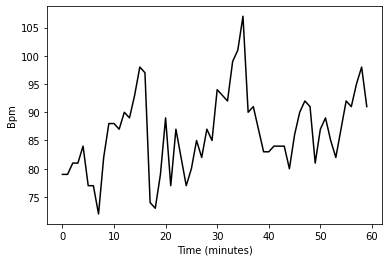

In [3]:
plt.plot(heart_rate,color='black')
plt.xlabel('Time (minutes)');
plt.ylabel('Bpm');


# Compose Dataset

In [179]:
import pandas as pd
df_ppg=pd.read_excel('/content/PPG-BP dataset - Copia.xlsx')

In [180]:
df_ppg=df_ppg.drop(['Num.','subject_ID','Sex(M/F)'	,'Age(year)'	,'Height(cm)','Weight(kg)','BMI(kg/m^2)',	'Hypertension'],axis=1)
df_ppg.head()

,Systolic Blood Pressure(mmHg),Diastolic Blood Pressure(mmHg),Heart Rate(b/m)
0,161,89,97
1,160,93,76
2,101,71,79
3,136,93,87
4,123,73,73


In [181]:
df_framingham=pd.read_csv('/content/framingham.csv')
colums_df_framingham=df_framingham.columns
df_framingham=df_framingham.drop(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'BMI', 'glucose', 'TenYearCHD'],axis=1)
df_framingham=df_framingham.rename(columns={"sysBP": "Systolic Blood Pressure(mmHg)", "heartRate": "Heart Rate(b/m)","diaBP":"Diastolic Blood Pressure(mmHg)"})
df_framingham

,Systolic Blood Pressure(mmHg),Diastolic Blood Pressure(mmHg),Heart Rate(b/m)
0,106.0,70.0,80.0
1,121.0,81.0,95.0
2,127.5,80.0,75.0
3,150.0,95.0,65.0
4,130.0,84.0,85.0
...,...,...,...
4235,131.0,72.0,84.0
4236,126.5,87.0,86.0
4237,133.5,83.0,80.0
4238,141.0,98.0,67.0


In [182]:
result = pd.concat([df_ppg,df_framingham])
df=result

In [183]:
df=df.reset_index()
df=df.drop(['index'],axis=1)
df

,Systolic Blood Pressure(mmHg),Diastolic Blood Pressure(mmHg),Heart Rate(b/m)
0,161.0,89.0,97.0
1,160.0,93.0,76.0
2,101.0,71.0,79.0
3,136.0,93.0,87.0
4,123.0,73.0,73.0
...,...,...,...
4454,131.0,72.0,84.0
4455,126.5,87.0,86.0
4456,133.5,83.0,80.0
4457,141.0,98.0,67.0


# Pre-processing

In [184]:
df.isnull().sum()

Systolic Blood Pressure(mmHg)     0
Diastolic Blood Pressure(mmHg)    0
Heart Rate(b/m)                   1
dtype: int64

In [185]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

df = pd.DataFrame(imputer.fit_transform(df))
df.columns = df.columns
df.index = df.index

In [186]:
df=df.rename(columns={0: "Systolic Blood Pressure(mmHg)",1: "Heart Rate(b/m)",2:"Diastolic Blood Pressure(mmHg)"})
df.head()

,Systolic Blood Pressure(mmHg),Heart Rate(b/m),Diastolic Blood Pressure(mmHg)
0,161.0,89.0,97.0
1,160.0,93.0,76.0
2,101.0,71.0,79.0
3,136.0,93.0,87.0
4,123.0,73.0,73.0


In [187]:
print('Number of training examples to be deleted for outliers removal is ', len(df[df['Diastolic Blood Pressure(mmHg)'] > 110])+len(df[df['Systolic Blood Pressure(mmHg)'] > 160]) + len(
    df[df['Heart Rate(b/m)'] > 125]))

Number of training examples to be deleted for outliers removal is  508


In [188]:
df = df[~(df['Systolic Blood Pressure(mmHg)'] > 160)]
df = df[~(df['Heart Rate(b/m)'] > 125)]

In [189]:
(df).skew()

Systolic Blood Pressure(mmHg)     0.153400
Heart Rate(b/m)                   0.107908
Diastolic Blood Pressure(mmHg)    0.650557
dtype: float64

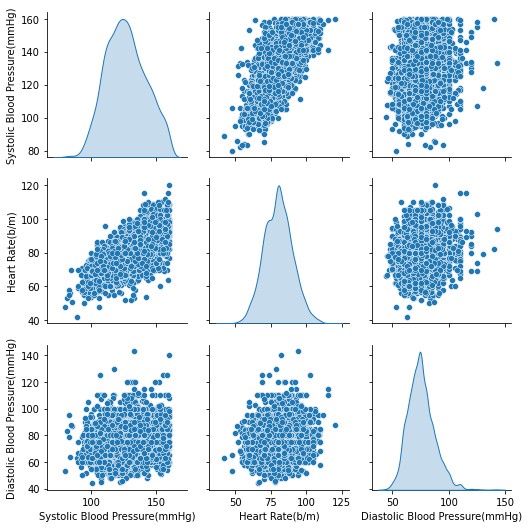

In [190]:
import seaborn as sns
sns.pairplot(df, diag_kind="kde")

# Regression

In [191]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Dropout, LSTM, Embedding
 
from keras.models import Sequential
print(tf.__version__)

2.9.2


In [201]:
def train_regression_model(df,blood_pressure):
  if(blood_pressure=="Systolic Blood Pressure(mmHg)"):
    blood_pressure_to_remove="Diastolic Blood Pressure(mmHg)"
  else:
    blood_pressure_to_remove="Systolic Blood Pressure(mmHg)"


  train_dataset = df.drop([blood_pressure_to_remove],axis=1).sample(frac=0.7,random_state=0)
  test_dataset = df.drop(train_dataset.index)


  train_stats = train_dataset.describe()
  result_stats =train_dataset.describe()
  result_stats.pop("Heart Rate(b/m)")
  result_stats=result_stats.transpose()

  train_stats.pop(blood_pressure)
  train_stats = train_stats.transpose()

  train_labels =  train_dataset.pop(blood_pressure)
  test_labels =  test_dataset.pop(blood_pressure) 

   
  def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
  
  normed_train_data = norm(train_dataset)
  normed_test_data = norm(test_dataset)
  
  def build_model():
    model = keras.Sequential([
      layers.Dense(32, activation='relu', input_shape=[len(train_dataset.keys())]),
      layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model


  model = build_model()
  
  class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
      if epoch % 100 == 0: print('')
      print('.', end='')

  EPOCHS = 100

  history = model.fit(
    normed_train_data, train_labels,
    epochs=EPOCHS, validation_split = 0.2, verbose=0,
    callbacks=[PrintDot()])
  
  model.save('models/'+blood_pressure+'_'+'model'+'.h5')
  data_stats={
      'mean':np.mean(np.array(train_dataset)),
      'std':np.std(np.array(train_dataset)),
      'interval':1.96*np.mean(np.array(train_dataset))/np.std(np.array(train_dataset))
  }
  data_stats_string = json.dumps(data_stats)
  with open('models/'+blood_pressure+'_'+'stats'+'.json', 'w') as outfile:
    outfile.write(data_stats_string)
  return history

In [202]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  
  plt.plot(hist['val_mse'],label='Test MSE')
  plt.plot(hist['mse'],label='Train MSE')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.figure()
  plt.plot(hist['val_mae'],label='Test MAE')
  plt.plot(hist['mae'],label='Train MAE')
  plt.xlabel('Epoch')
  plt.ylabel('MAE')
  plt.legend()
  plt.figure()
  plt.plot(hist['val_loss'],label='Test Loss')
  plt.plot(hist['loss'],label='Train Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()


....................................................................................................

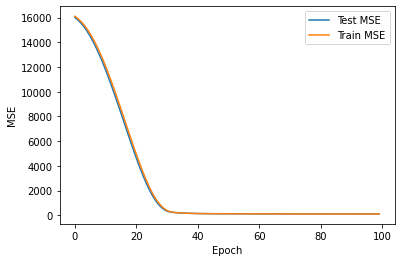

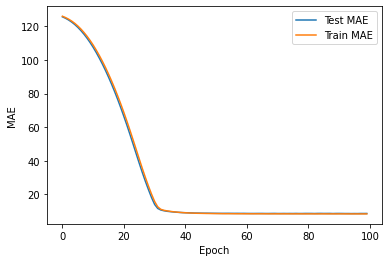

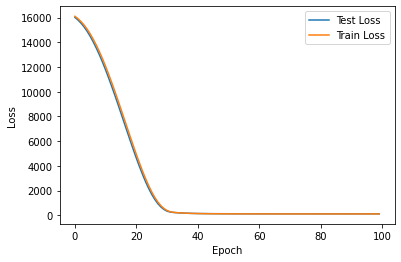

In [203]:
plot_history(train_regression_model(df,'Systolic Blood Pressure(mmHg)'))


....................................................................................................

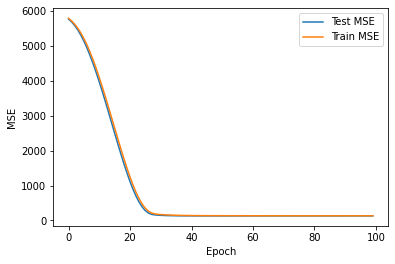

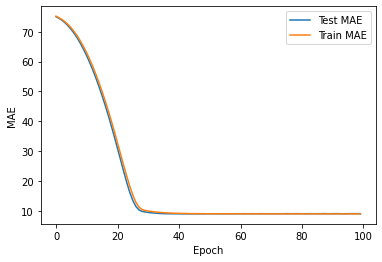

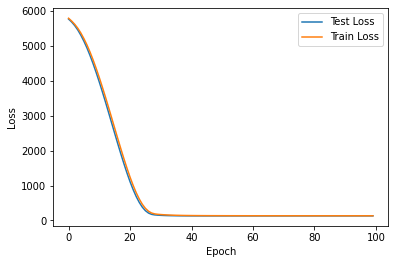

In [204]:
plot_history(train_regression_model(df,'Diastolic Blood Pressure(mmHg)'))

# Load saved models

In [205]:
from tensorflow.keras.models import load_model

systolic_model=load_model('models/Systolic Blood Pressure(mmHg)_model'+'.h5')

diastolic_model=load_model('models/Diastolic Blood Pressure(mmHg)_model'+'.h5')

In [206]:
systolic_model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 32)                64        
                                                                 
 dense_65 (Dense)            (None, 1)                 33        
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [207]:
diastolic_model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 32)                64        
                                                                 
 dense_67 (Dense)            (None, 1)                 33        
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [229]:
def get_blood_pressure_prediction(heart_rate,blood_pressure_stats,model):
  with open(blood_pressure_stats) as json_file:
    stats = json.load(json_file)
  heart_rate=np.array(heart_rate)
  normed_heart_rate=(heart_rate-stats['mean'])/stats['std']
  return model.predict(normed_heart_rate)-stats['interval']


In [228]:
systolic_prediction=get_blood_pressure_prediction(heart_rate,'/content/models/Systolic Blood Pressure(mmHg)_stats.json',systolic_model)
diastolic_prediction=get_blood_pressure_prediction(heart_rate,'/content/models/Diastolic Blood Pressure(mmHg)_stats.json',diastolic_model)

2/2 [==============================] - 0s 6ms/step


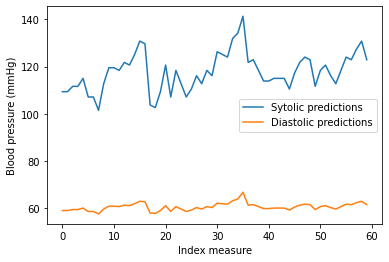

In [233]:
plt.plot(systolic_prediction,label='Sytolic predictions')
plt.plot(diastolic_prediction,label='Diastolic predictions')
plt.xlabel('Index measure')
plt.ylabel('Blood pressure (mmHg)')
plt.legend()


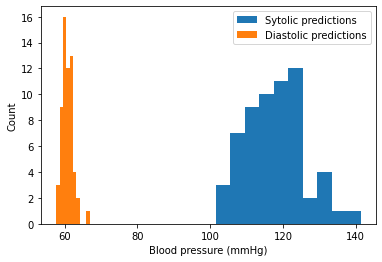

In [235]:
plt.hist(systolic_prediction,label='Sytolic predictions')
plt.hist(diastolic_prediction,label='Diastolic predictions')
plt.ylabel('Count')
plt.xlabel('Blood pressure (mmHg)')
plt.legend()
